# **O PROBLEMA**

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

Origem dos dados: Arquivo 'insurance.csv' obtido através do github do curso(https://github.com/FIAP/CURSO_IA_ML)

**0 - Imports**

In [137]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor

***1 - Leitura dos dados***

In [138]:
df = pd.read_csv('insurance.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
df.shape

(1338, 7)

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Verificando dados duplicados:

In [107]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Removendo dados duplicados

In [139]:
df = df.drop_duplicates(keep='first')
df[df.duplicated(keep='first')]


,age,sex,bmi,children,smoker,region,charges


Ajustando formato dos dados das colunas categoricas:

In [140]:
label_encoder = LabelEncoder()
sex_original = df[['sex']].copy()
smoker_original = df[['smoker']].copy()
region_original = df[['region']].copy()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


***2 - Representação gráfica dos dados***

In [86]:
sns.set(style='darkgrid')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

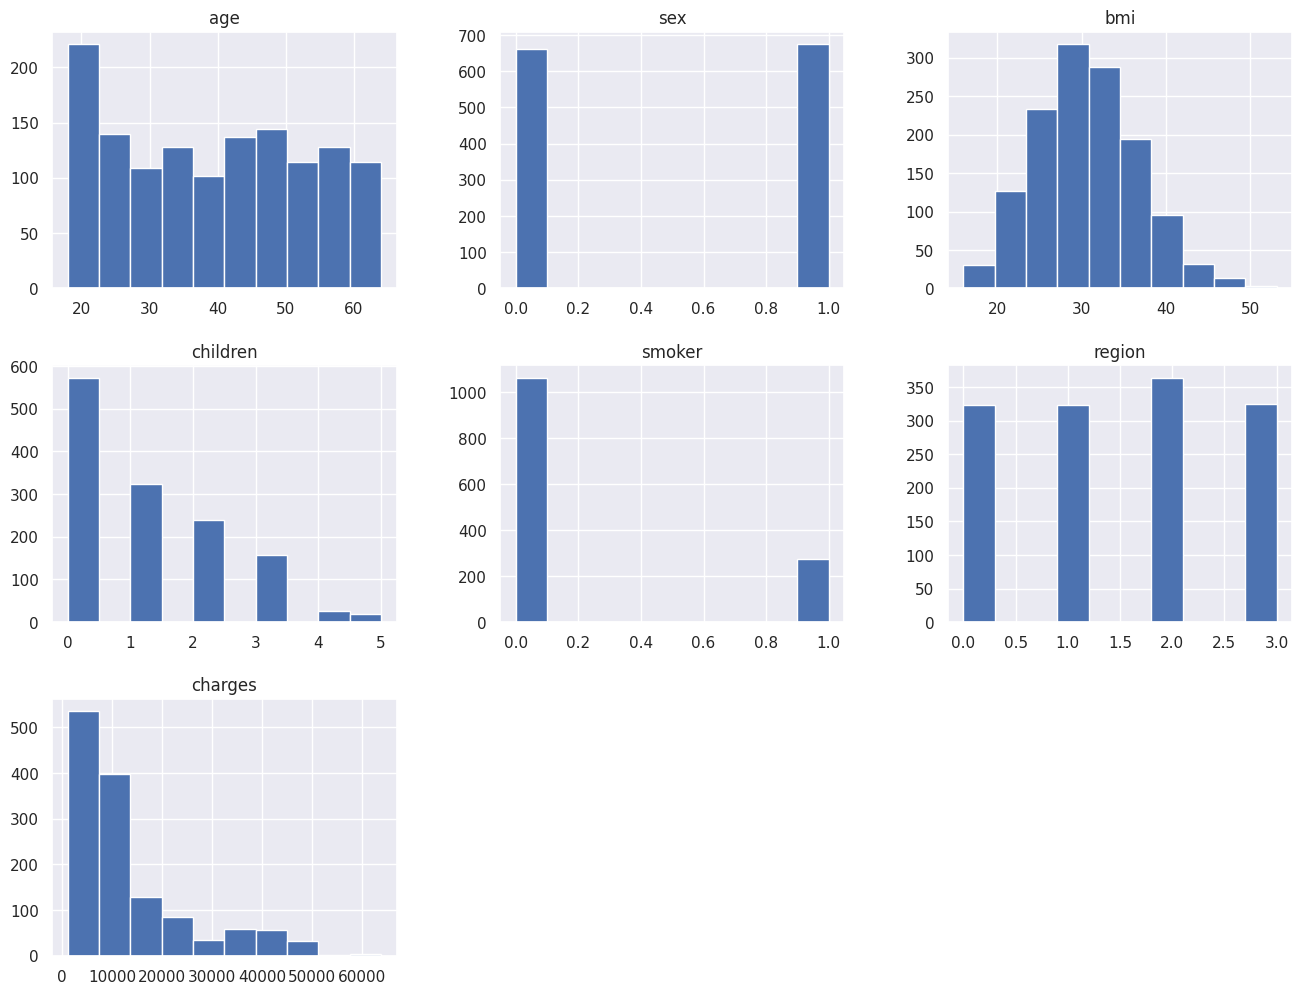

In [104]:
df.hist(bins=10, figsize=(16, 12))

Histograma com densidade estimada (KDE) para **Charges**

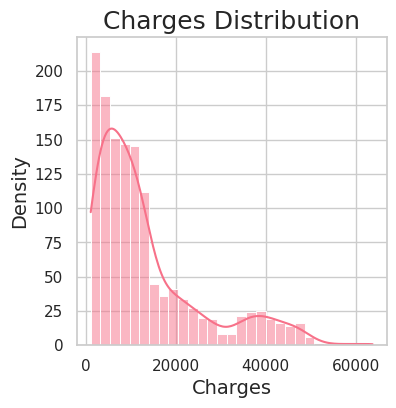

In [141]:
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")
custom_palette = sns.color_palette("husl", 3)
sns.histplot(df['charges'], kde=True, color=custom_palette[0])
plt.title('Charges Distribution', size=18)
plt.xlabel('Charges', size=14)
plt.ylabel('Density', size=14)
plt.show()

Visualização dos outliers para a target:

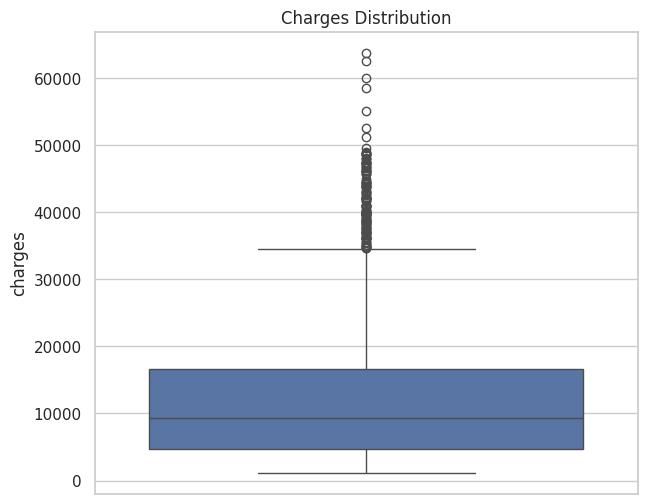

In [142]:
plt.figure(figsize=(7,6))
sns.boxplot(df.charges)
plt.title('Charges Distribution')
plt.show()

Q1: 4746.344
Q3: 16657.71745
IQR: 11911.37345
Lower Bound: -13120.716174999998
Upper Bound: 34524.777625
Number of outliers: 139


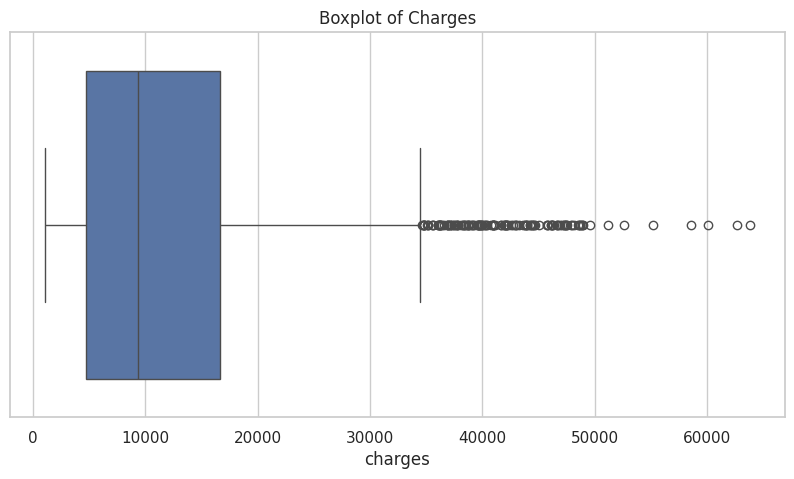

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

# Identificar outliers
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

print(f'Number of outliers: {outliers.shape[0]}')

# Visualizar os outliers
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Charges')
plt.show()


Remoção dos outliers:

In [172]:
data_remove_outl = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]
print(f'Original shape: {df.shape}')
print(f'Shape after outlier removal: {data_remove_outl.shape}')

Original shape: (1337, 7)
Shape after outlier removal: (1198, 7)


Transformação logarítmica nos outliers

In [174]:
df_trans = df.copy()
df_trans['charges'] = df_trans['charges'].apply(lambda x: np.log(x + 1))

Analisando os custos por idade e fumantes:

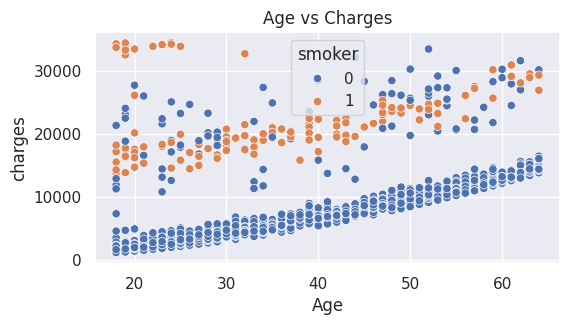

In [101]:
plt.figure(figsize=(6,3))
sns.scatterplot(x='age',y='charges',hue='smoker',data=data_remove_outl, palette='deep')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

<Figure size 200x200 with 0 Axes>

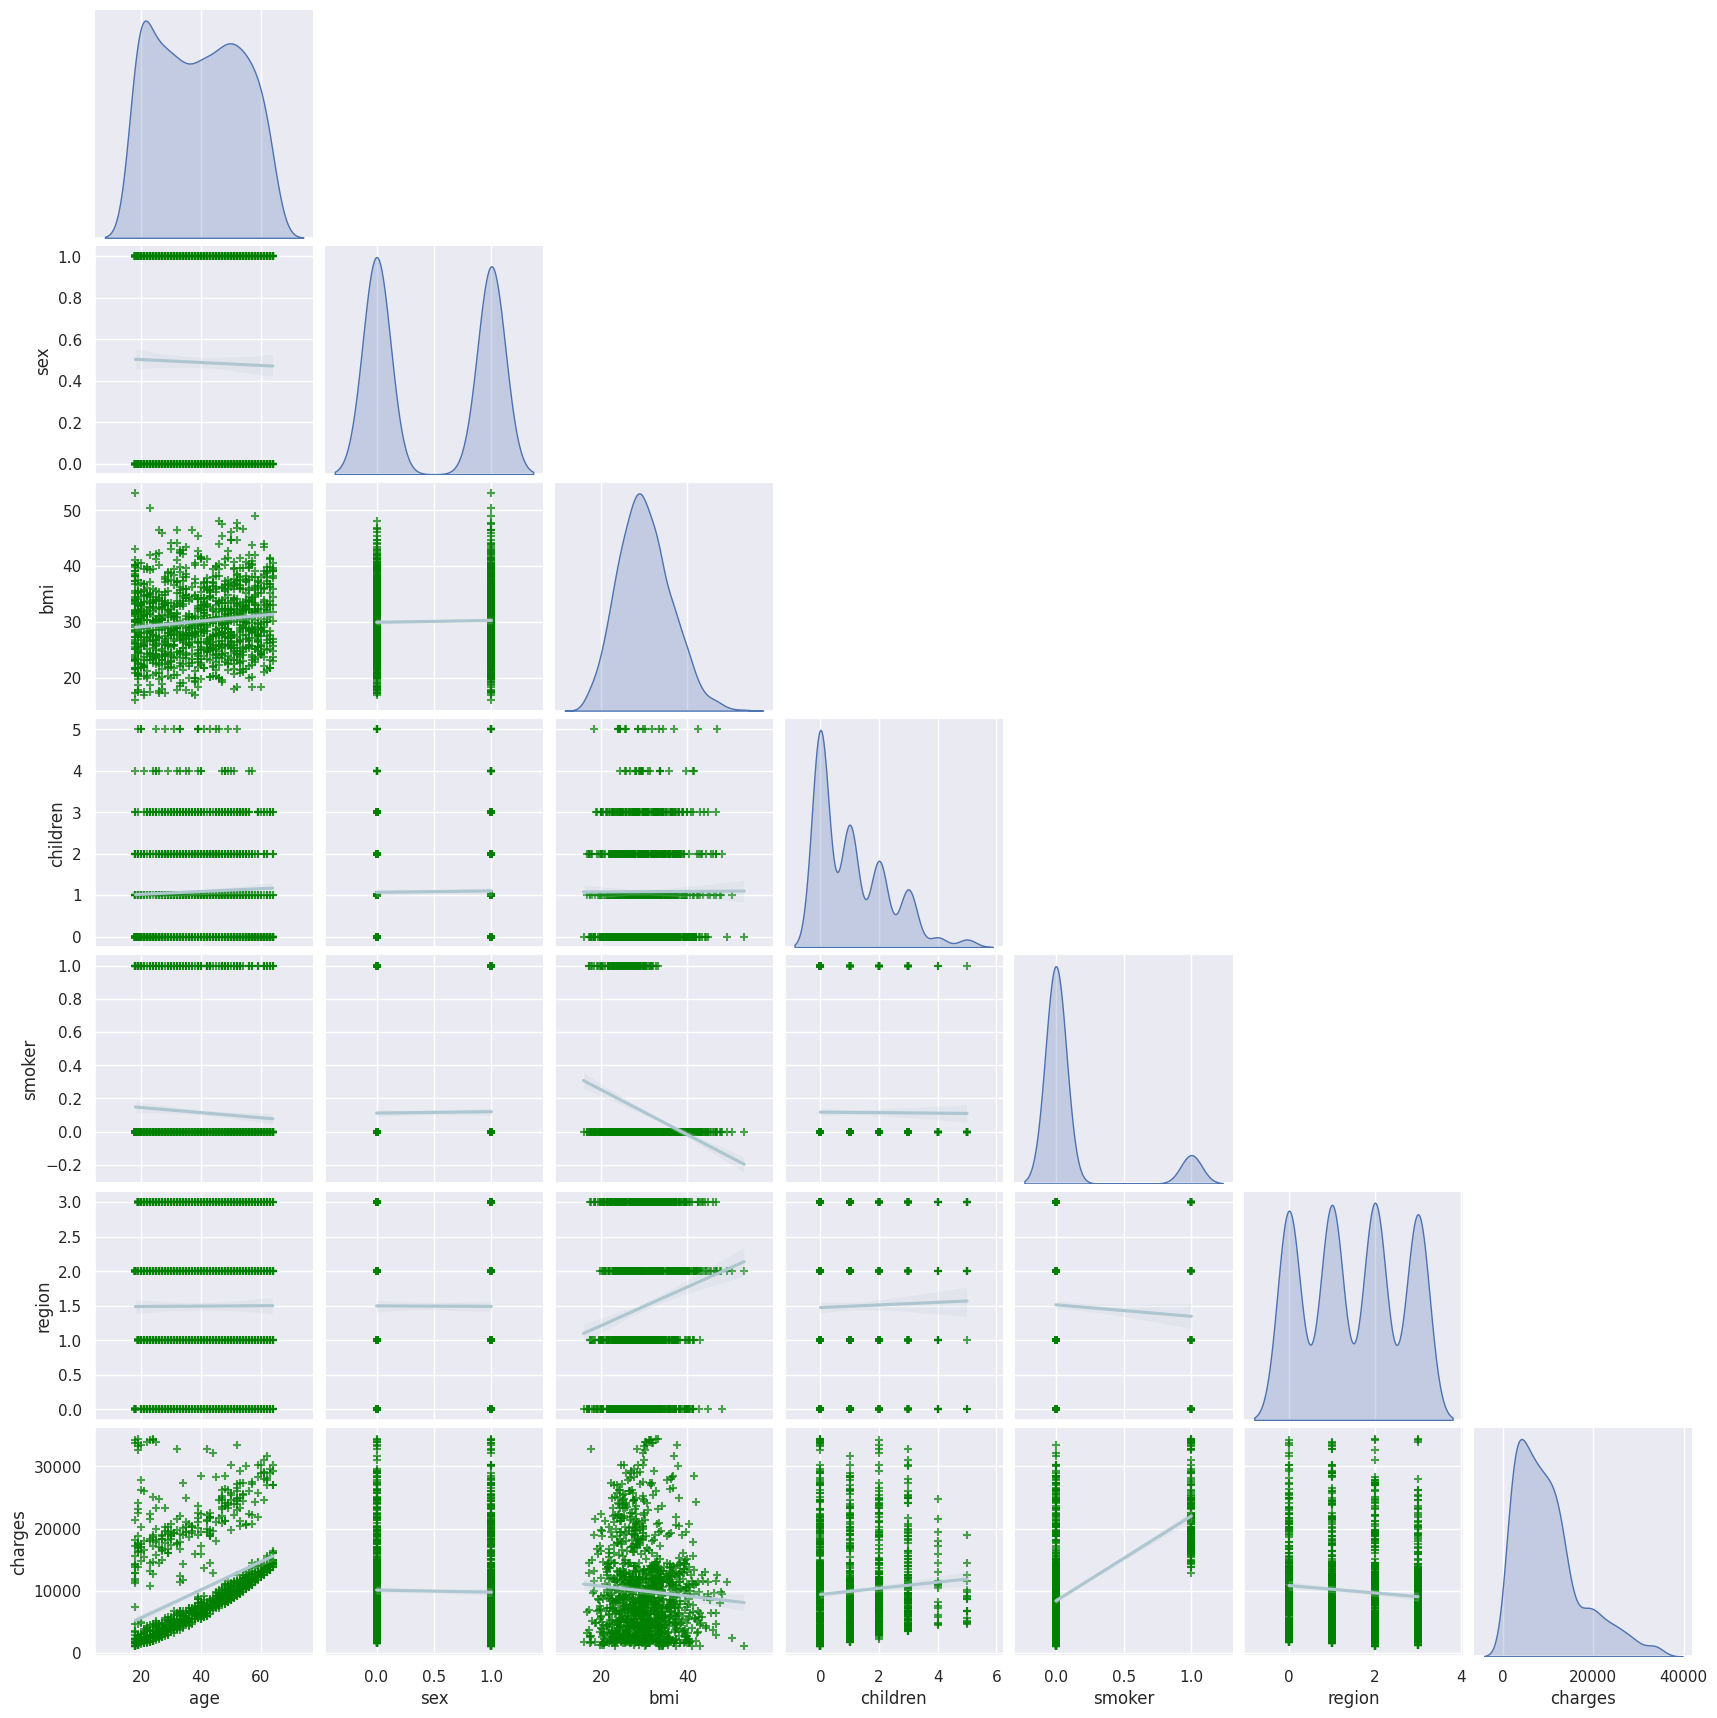

In [111]:
plt.figure(figsize=(2,2))
sns.pairplot(data_remove_outl,
             markers='+',
             diag_kind='kde',
             kind='reg',
             plot_kws={'line_kws':{'color':'#aec6cf'},
                       'scatter_kws':{'alpha':0.7,
                                      'color':'green'}},
             corner=True);
plt.show()

Separando bases para aplicação dos modelos:

In [169]:
df_normalizada = df.copy()
df_padronizada = df.copy()
df_sem_outl_normalizada = data_remove_outl.copy()
df_sem_outl_padronizada = data_remove_outl.copy()


Aplicando o modelo:

Depth: 1, Accuracy: 0.6438
Depth: 2, Accuracy: 0.8369
Depth: 3, Accuracy: 0.8564
Depth: 4, Accuracy: 0.8665
Depth: 5, Accuracy: 0.8715
Depth: 6, Accuracy: 0.8586
Depth: 7, Accuracy: 0.8453
Depth: 8, Accuracy: 0.8316
Depth: 9, Accuracy: 0.8076
Depth: 10, Accuracy: 0.7804
Best Depth: 5, Best Accuracy: 0.8715


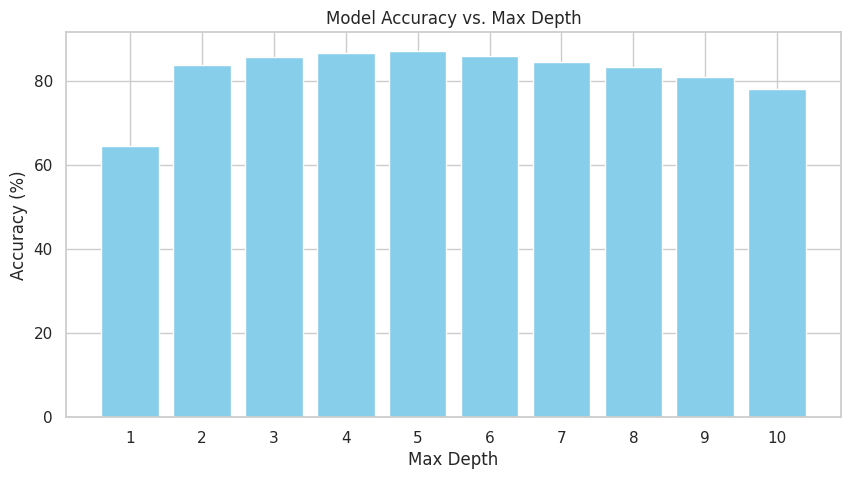

In [156]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = range(1, 11)
accuracies = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}')

best_depth = depths[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f'Best Depth: {best_depth}, Best Accuracy: {best_accuracy:.4f}')
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(depths, [a * 100 for a in accuracies], color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs. Max Depth')
plt.xticks(depths)
plt.show()

Depth: 1, Accuracy: 0.3612
Depth: 2, Accuracy: 0.5409
Depth: 3, Accuracy: 0.6012
Depth: 4, Accuracy: 0.6182
Depth: 5, Accuracy: 0.6118
Depth: 6, Accuracy: 0.5830
Depth: 7, Accuracy: 0.4727
Depth: 8, Accuracy: 0.4274
Depth: 9, Accuracy: 0.3089
Depth: 10, Accuracy: 0.3500
Best Depth: 4, Best Accuracy: 0.6182


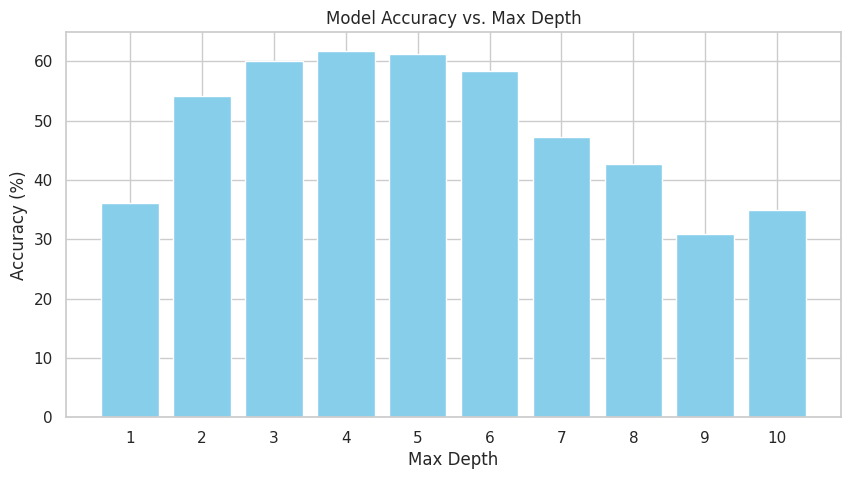

In [173]:
X = data_remove_outl.drop('charges', axis=1)
y = data_remove_outl['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = range(1, 11)
accuracies = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}')

best_depth = depths[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f'Best Depth: {best_depth}, Best Accuracy: {best_accuracy:.4f}')
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(depths, [a * 100 for a in accuracies], color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs. Max Depth')
plt.xticks(depths)
plt.show()

Padronização

Depth: 1, Accuracy: 0.6438
Depth: 2, Accuracy: 0.8369
Depth: 3, Accuracy: 0.8564
Depth: 4, Accuracy: 0.8665
Depth: 5, Accuracy: 0.8715
Depth: 6, Accuracy: 0.8582
Depth: 7, Accuracy: 0.8378
Depth: 8, Accuracy: 0.8254
Depth: 9, Accuracy: 0.8016
Depth: 10, Accuracy: 0.7961
Best Depth: 5, Best Accuracy: 0.8715


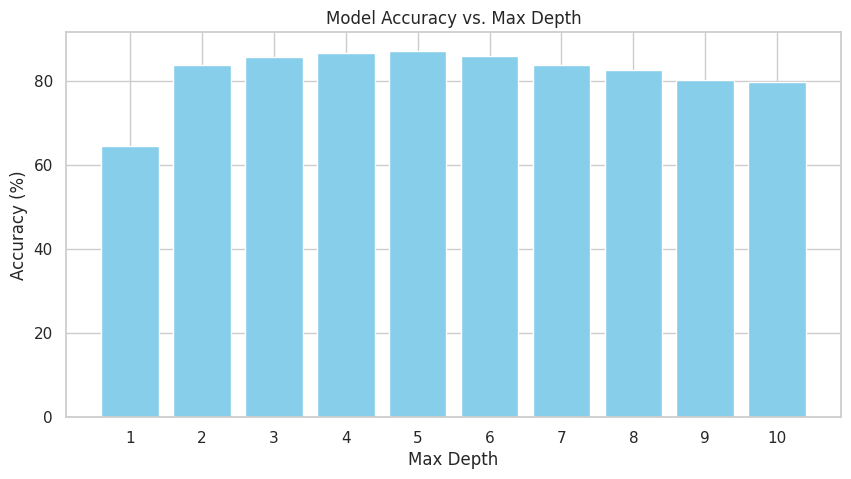

In [158]:
scaler = StandardScaler()

X = df_padronizada.drop('charges', axis=1)
y = df_padronizada['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = range(1, 11)
accuracies = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}')

best_depth = depths[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f'Best Depth: {best_depth}, Best Accuracy: {best_accuracy:.4f}')
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(depths, [a * 100 for a in accuracies], color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs. Max Depth')
plt.xticks(depths)
plt.show()

Depth: 1, Accuracy: 0.6438
Depth: 2, Accuracy: 0.8369
Depth: 3, Accuracy: 0.8564
Depth: 4, Accuracy: 0.8665
Depth: 5, Accuracy: 0.8715
Depth: 6, Accuracy: 0.8586
Depth: 7, Accuracy: 0.8452
Depth: 8, Accuracy: 0.8312
Depth: 9, Accuracy: 0.8076
Depth: 10, Accuracy: 0.7878
Best Depth: 5, Best Accuracy: 0.8715


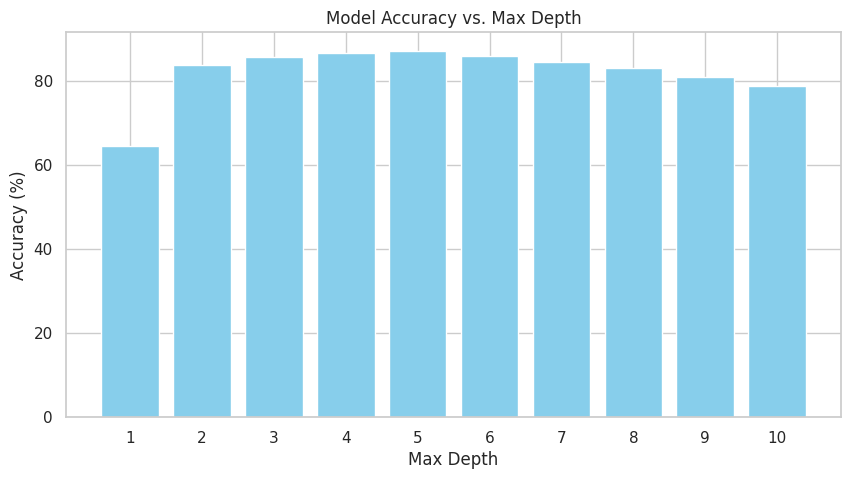

In [159]:
scaler = MinMaxScaler()

X = df_normalizada.drop('charges', axis=1)
y = df_normalizada['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = range(1, 11)
accuracies = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}')

best_depth = depths[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f'Best Depth: {best_depth}, Best Accuracy: {best_accuracy:.4f}')
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(depths, [a * 100 for a in accuracies], color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs. Max Depth')
plt.xticks(depths)
plt.show()

Depth: 1, Accuracy: 0.3612
Depth: 2, Accuracy: 0.5409
Depth: 3, Accuracy: 0.6012
Depth: 4, Accuracy: 0.6182
Depth: 5, Accuracy: 0.6117
Depth: 6, Accuracy: 0.5811
Depth: 7, Accuracy: 0.4609
Depth: 8, Accuracy: 0.4136
Depth: 9, Accuracy: 0.3296
Depth: 10, Accuracy: 0.3547
Best Depth: 4, Best Accuracy: 0.6182


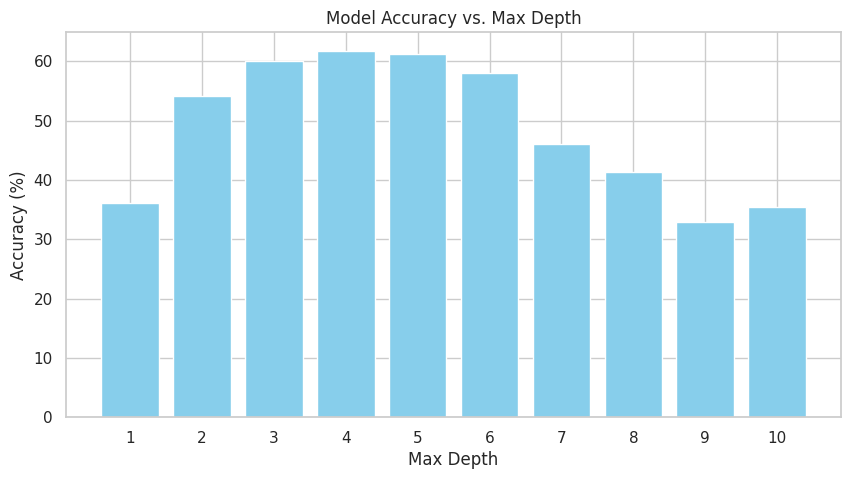

In [160]:
scaler = StandardScaler()

X = df_sem_outl_padronizada.drop('charges', axis=1)
y = df_sem_outl_padronizada['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = range(1, 11)
accuracies = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}')

best_depth = depths[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f'Best Depth: {best_depth}, Best Accuracy: {best_accuracy:.4f}')
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(depths, [a * 100 for a in accuracies], color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs. Max Depth')
plt.xticks(depths)
plt.show()

Depth: 1, Accuracy: 0.3612
Depth: 2, Accuracy: 0.5409
Depth: 3, Accuracy: 0.6012
Depth: 4, Accuracy: 0.6194
Depth: 5, Accuracy: 0.6103
Depth: 6, Accuracy: 0.5814
Depth: 7, Accuracy: 0.4632
Depth: 8, Accuracy: 0.4049
Depth: 9, Accuracy: 0.3543
Depth: 10, Accuracy: 0.3619
Best Depth: 4, Best Accuracy: 0.6194


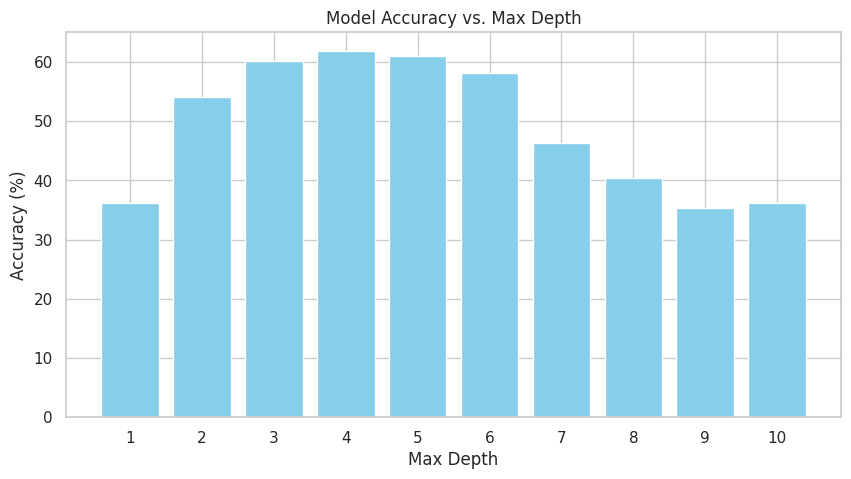

In [161]:
scaler = MinMaxScaler()

X = df_sem_outl_normalizada.drop('charges', axis=1)
y = df_sem_outl_normalizada['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = range(1, 11)
accuracies = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}')

best_depth = depths[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f'Best Depth: {best_depth}, Best Accuracy: {best_accuracy:.4f}')
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(depths, [a * 100 for a in accuracies], color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs. Max Depth')
plt.xticks(depths)
plt.show()

Depth: 1, Accuracy: 0.4586
Depth: 2, Accuracy: 0.7201
Depth: 3, Accuracy: 0.7967
Depth: 4, Accuracy: 0.8279
Depth: 5, Accuracy: 0.8325
Depth: 6, Accuracy: 0.8299
Depth: 7, Accuracy: 0.8119
Depth: 8, Accuracy: 0.7996
Depth: 9, Accuracy: 0.7432
Depth: 10, Accuracy: 0.6983
Best Depth: 5, Best Accuracy: 0.8325


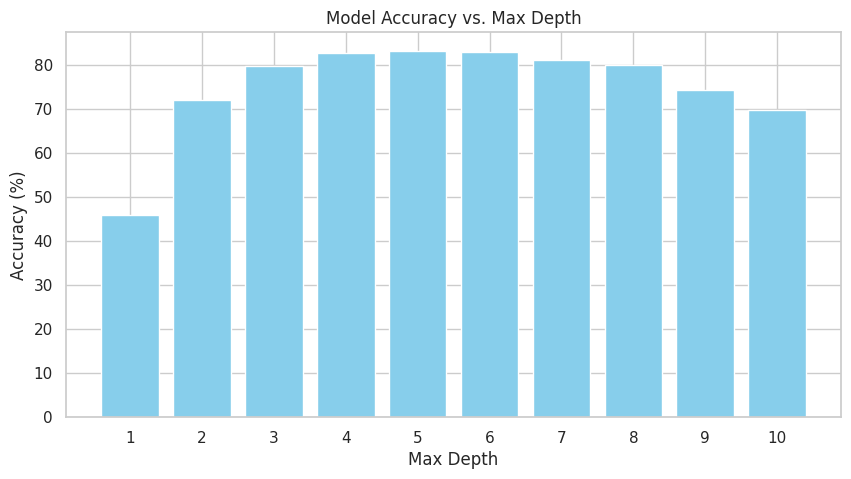

In [175]:
X = df_trans.drop('charges', axis=1)
y = df_trans['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = range(1, 11)
accuracies = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Depth: {depth}, Accuracy: {accuracy:.4f}')

best_depth = depths[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f'Best Depth: {best_depth}, Best Accuracy: {best_accuracy:.4f}')
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(depths, [a * 100 for a in accuracies], color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs. Max Depth')
plt.xticks(depths)
plt.show()